# Kepler's Law

* Kepler used the most accurate measurements of planetary positions available at that time. Although the differences were rather minute, Kepler concluded from his analysis that the planets move on elliptical orbits, where the Sun is located in one focal point (first law) and, in modern language, the area swept by the radial vector from the Sun to a planet is proportional to the elapsed time (second law).
* Later Kepler found a relation between the semi-major axes (the line segment from the center through the focus to the perimeter of an ellipse) and the orbital periods, which today is known as Kepler’s third law. Isaac Newton found a theoretical explanation for Kepler’s laws of planetary motion by applying his universal law of gravity and angular momentum conservation.
* The Keplerian period, or simply the "orbital period," refers to the time it takes for a celestial body to complete one orbit around another body. This is typically applied to planets orbiting a star or moons orbiting a planet:
  > $T = 2\pi \sqrt{\frac{a^3}{GM}}$
  
  where:

  $T$: the orbital period
  
  $a$: the semi-major axis of the orbit

  $G$: is the gravitational constant

  $M$: is the mass of the more massive body, typically a star or planet that the smaller object is orbiting

* In a system where the two bodies have significant mass, such as a binary star system, you would use the combined mass of the two bodies:
  > $T = 2\pi \sqrt{\frac{a^3}{G(M_1 + M_2)}}$
  
  where:

  $T$: the orbital period
  
  $a$: the semi-major axis of the orbit

  $G$: is the gravitational constant

  $M$: is the mass of the more massive body, typically a star or planet that the smaller object is orbiting

* The general formulation for the period $P$ f a planet moving on an elliptical orbit around a star reads:
  > $P^2 = \frac{4 \pi^2}{G(M + m)} \times a^3$

  where:

  $P$: period

  $a$: the semi-major axis of the orbit
  
  $G$: the gravitational constant

  $M$: the mass of the star

  $m$: the mass of the planet

In [38]:
import math,numpy as np
from scipy.constants import year,hour,au,G
from astropy.constants import M_sun
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

In [39]:
print(f"Gravitational Constant: {G}")

Gravitational Constant: 6.6743e-11


In [40]:
massSun = M_sun.value # mass of the Sun in kg
print(f"Mass of Sun: {massSun} kg")

Mass of Sun: 1.988409870698051e+30 kg


In [41]:
# https://nssdc.gsfc.nasa.gov/planetary/factsheet/
massPlanets = 1e24 * np.array([0.33011,4.8675,5.9723,0.64171,1898.19,568.34,86.813,102.413]) # in kg

In [42]:
semiMajorPlanets = 1e9 * np.array([57.9,108.21,149.60,227.92,778.57,1433.53,2872.46,4495.06]) # in m

In [43]:
# use Kepler’s third law to calculate period in s
TTestMass = 2*math.pi*(G*massSun)**(-1/2)*semiMajorPlanets**(3/2)
TTwoBody = 2*math.pi*(G*(massSun+massPlanets))**(-1/2)*semiMajorPlanets**(3/2)

In [44]:
print("PERIOD T[yr]  DEVIATION TEST MASS[hr]  DEVIATION RELATIVE[rel]")
for testValue,bodyValue in zip(TTestMass,TTwoBody):
  dev = testValue-bodyValue
  if dev>hour:
    line = "{0:6.2f}          {1:<7.1f}                   {2:.1e}"
  else:
    line = "{0:6.2f}          {1:7.4f}                    {2:.1e}"
  print(line.format(bodyValue/year,dev/hour,dev/testValue))

PERIOD T[yr]  DEVIATION TEST MASS[hr]  DEVIATION RELATIVE[rel]
  0.24           0.0002                    8.3e-08
  0.62           0.0066                    1.2e-06
  1.00           0.0132                    1.5e-06
  1.88           0.0027                    1.6e-07
 11.88          49.6                      4.8e-04
 29.68          37.2                      1.4e-04
 84.20          16.1                      2.2e-05
164.82          37.2                      2.6e-05


**The deviation from the test-mass approximation is larger for the outer planets (Jupiter,Saturn, Uranus, and Neptune), as they are much more massive than the inner planets (Mercury, Venus, Earth, and Mars)**

**Nevertheless, the relative error of the orbital period is small.**

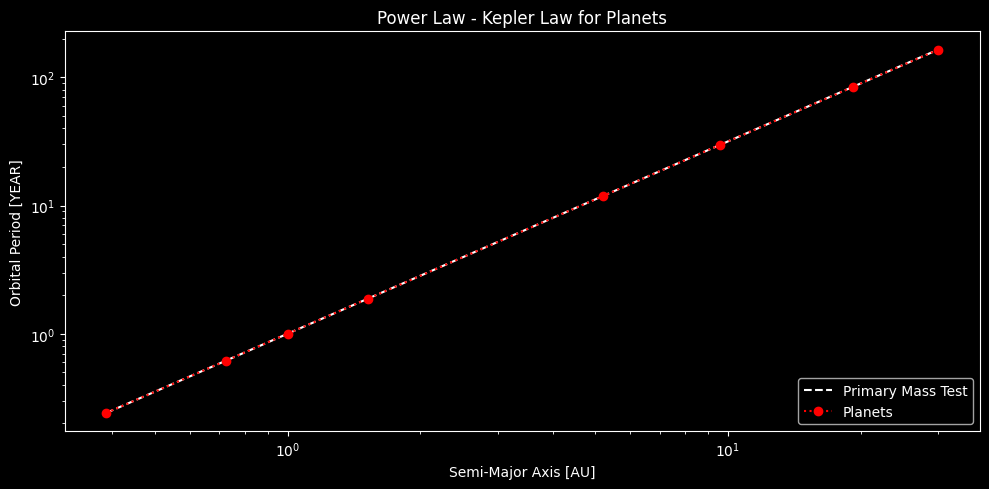

In [45]:
# Plotting the period in hr versus the semi-major axis in AU
plt.figure(figsize=(10,5))
plt.title("Power Law - Kepler Law for Planets")
plt.loglog(semiMajorPlanets/au,TTestMass/year,"white",linestyle="--",label="Primary Mass Test")
plt.loglog(semiMajorPlanets/au,TTwoBody/year,"ro",linestyle=":",label="Planets")
plt.legend(loc="lower right")
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel("Orbital Period [YEAR]")
plt.tight_layout()
plt.show()

In [46]:
def KeplerPeriod(semiMajor:int,MassOne:int or float,MassTwo:int or float or None=None)->int or float:
  """
    Calculate the orbital period using Kepler's third law.

    Parameters:
    semiMajor (float): Semi-major axis of the orbit (in astronomical units, AU).
    MassOne (float): Mass of the primary body (in solar masses).
    MassTwo (float, optional): Mass of the secondary body (in solar masses), if applicable.

    Returns:
    float: Orbital period (in years).
  """
  # Gravitational constant in AU^3 / solar mass / year^2
  gravitationalConstant = 39.47841760435743
  # If M2 is given, use the combined mass of the two bodies
  mass = MassOne if MassTwo is None else MassOne+MassTwo
  # Calculate the orbital period using Kepler's third law
  orbitalPeriod = 2*math.pi*math.sqrt(semiMajor**3/(gravitationalConstant*mass))
  return orbitalPeriod

In [47]:
# with a semi-major axis of 1 AU (Earth's distance from the Sun)
a = 1 # in AU
massPrimary = 1 # mass of the Sun in solar masses
# The function returns an orbital period of 1 year, which is expected for an Earth-like orbit around a Sun-like star.
orbitalPeriod = KeplerPeriod(semiMajor=a,MassOne=massPrimary)
print(f"Orbital Period: {orbitalPeriod} year")

Orbital Period: 1.0 year


In [48]:
semiMajorforNeptune = 30.1 # in AU
mass = 1 # mass of the Sun in solar masses
orbitalPeriodNeptune = KeplerPeriod(semiMajor=semiMajorforNeptune,MassOne=mass)
print(f"Orbital Period of Neptune: {orbitalPeriodNeptune} year")

Orbital Period of Neptune: 165.13903536111624 year


In [49]:
# the semi-major axis for each planet in astronomical units (au)
semiMajors = {
    "Mercury": 0.387,
    "Venus": 0.723,
    "Earth": 1.000,
    "Mars": 1.524,
    "Jupiter": 5.203,
    "Saturn": 9.537,
    "Uranus": 19.191,
    "Neptune": 30.069
}

In [50]:
massSun = 1 # Mass of the Sun in solar masses
gravitationalConstant = 39.47841760435743 # Gravitational constant in AU^3 / solar mass / year^2

In [51]:
# Calculate the orbital periods using Kepler's third law
orbitalPeriods = {planet:2*np.pi*np.sqrt(a**3/(gravitationalConstant*massSun)) for planet,a in semiMajors.items()}

In [52]:
arraySemiMajors = np.array(list(semiMajors.values()))
arrayOrbitalPeriods = np.array(list(orbitalPeriods.values()))

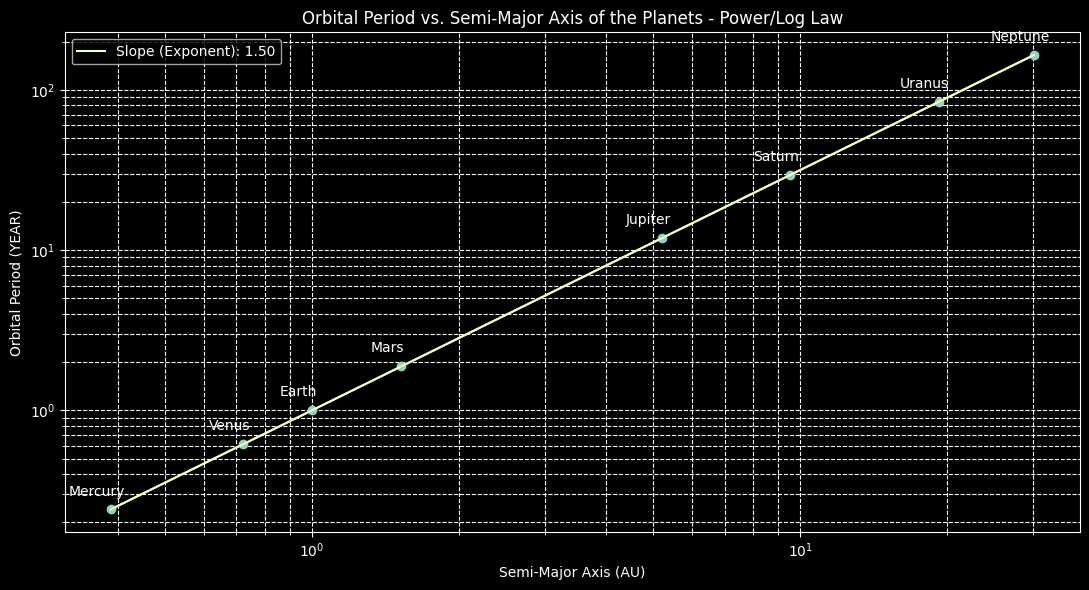

In [53]:
# The plot displays the relationship between the semi-major axis and orbital period for the planets in our solar system on a double-logarithmic scale.
# The slope of the line in the double-logarithmic plot corresponds to the exponent 3/2 in Kepler's third law.
plt.figure(figsize=(11,6))
plt.title("Orbital Period vs. Semi-Major Axis of the Planets - Power/Log Law")
plt.loglog(arraySemiMajors,arrayOrbitalPeriods,"o-")
# Create a linear fit to the log of the data to represent the power law
coefficients = np.polyfit(
    np.log(arraySemiMajors),
    np.log(arrayOrbitalPeriods),
    1
)
polynomial = np.poly1d(coefficients)
periodsFit = np.exp(polynomial(np.log(arraySemiMajors)))
plt.loglog(arraySemiMajors,periodsFit,label=f"Slope (Exponent): {coefficients[0]:.2f}")
for planet,semiMajor in semiMajors.items():
  plt.annotate(
      planet,
      (semiMajor,orbitalPeriods[planet]),
      textcoords="offset points",
      xytext=(-10,10),
      ha="center"
  )
plt.xlabel("Semi-Major Axis (AU)")
plt.ylabel("Orbital Period (YEAR)")
plt.legend()
plt.grid(True,which="both",ls="--")
plt.tight_layout()
plt.show()

**Each point on the graph represents one of the planets, with their names annotated for clarity.**

**The line through the points represents the best fit to the power law relationship, demonstrating how well Kepler's third law describes the motion of the planets.**

## Interval Example

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate orbital periods for each semi-major axis
orbital_periods = [kepler_period(a, M_star) for a in semi_major_axes]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(semi_major_axes, orbital_periods)
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Orbital Period (years)')
plt.title('Change in Orbital Period as a Secondary Body Moves Away from Its Star')
plt.grid(True)
plt.show()

In [54]:
gravitationalConstant = 39.47841760435743  # gravitational constant in AU^3 / solar mass / year^2
massStar = 1  # mass of the star in solar masses (assuming a star similar to our Sun)

In [55]:
def KeplerPeriod(semiMajor:int or float,massPrimarly:int or float)->int or float:
  """
    Calculate the orbital period using Kepler's Third Law.

    Parameters:
    semiMajor (float): Semi-major axis of the orbit (in astronomical units, AU).
    massPrimarly (float): Mass of the primary star (in solar masses).

    Returns:
    float: Orbital period (in years).
  """
  return 2*np.pi*np.sqrt(semiMajor**3/(gravitationalConstant*massPrimarly))

In [56]:
semiMajorAxes = np.linspace(0.1,50,500) # From 0.1 AU to 50 AU

In [57]:
periodsList = [KeplerPeriod(ax,massStar) for ax in semiMajorAxes]

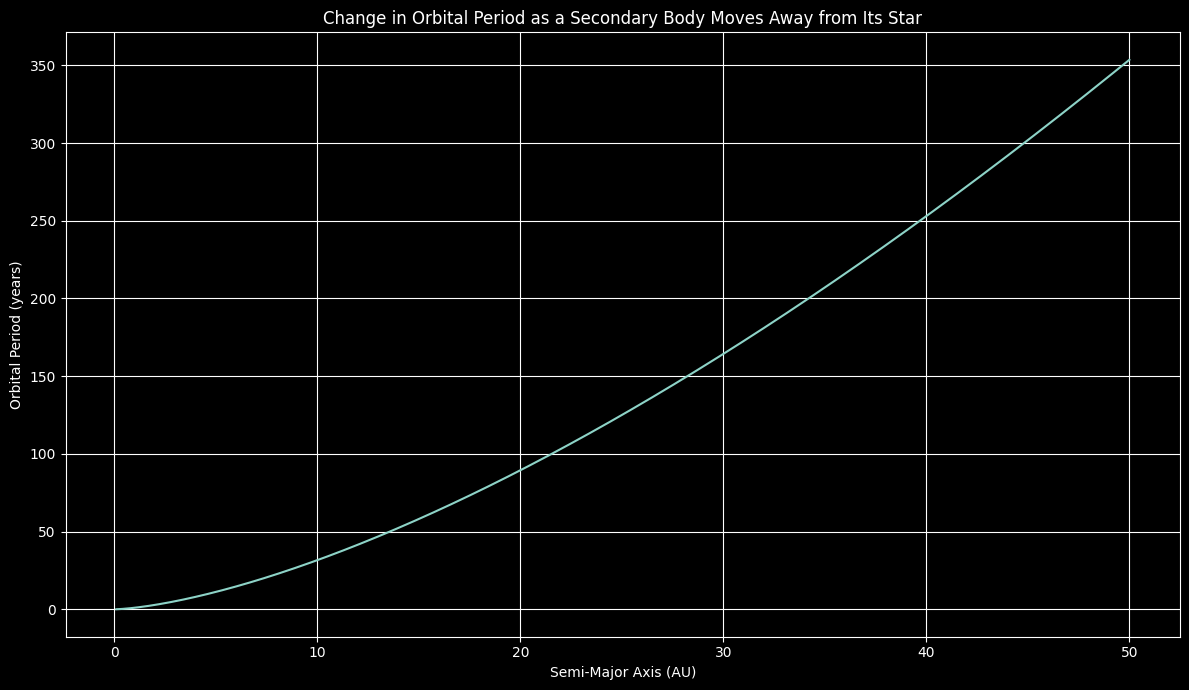

In [58]:
plt.figure(figsize=(12,7))
plt.title("Change in Orbital Period as a Secondary Body Moves Away from Its Star")
plt.plot(semiMajorAxes,periodsList)
plt.xlabel("Semi-Major Axis (AU)")
plt.ylabel("Orbital Period (years)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
def ModelOrbitalVariation(primaryMass:int or float,minSemiMajor:int or float,maxSemiMajor:int or float,countPoint:int)->tuple:
  """
    Model how the orbital period of a secondary body changes as it moves away from its primary star.

    Parameters:
    primaryMass (float): Mass of the primary star (in solar masses).
    minSemiMajor (float): Minimum semi-major axis to consider (in AU).
    maxSemiMajor (float): Maximum semi-major axis to consider (in AU).
    countPoint (int): Number of data points to model between the minimum and maximum semi-major axis.

    Returns:
    tuple: Tuple containing arrays of semi-major axes and corresponding orbital periods.
  """
  semiMajors = np.linspace(minSemiMajor,maxSemiMajor,countPoint)
  orbitalPeriods = KeplerPeriod(semiMajors,primaryMass)
  return (semiMajors,orbitalPeriods)

In [60]:
def VariationPlot(semiMajorAxs:list,orbitalPeriods:list):
  """
    Plot the variation of the orbital period with the semi-major axis.

    Parameters:
    semiMajorAxs (array): Array of semi-major axes (in AU).
    orbitalPeriods (array): Array of orbital periods (in years).
  """
  plt.figure(figsize=(10,5))
  plt.title("Orbital Period Variation with Semi-Major Axis")
  plt.plot(semiMajorAxs,orbitalPeriods)
  plt.xlabel("Semi-Major Axis (AU)")
  plt.ylabel("Orbital Period (years)")
  plt.grid(True)
  plt.show()

In [61]:
primaryMass = 1 # Mass of the Sun in solar masses
minSemiMajor = 0.1 # Starting at 0.1 AU
maxSemiMajor = 100 # Going out to 100 AU
modelInputs = 1000 # The resolution of the model

In [63]:
semiMajors,periods = ModelOrbitalVariation(primaryMass,minSemiMajor,maxSemiMajor,modelInputs)

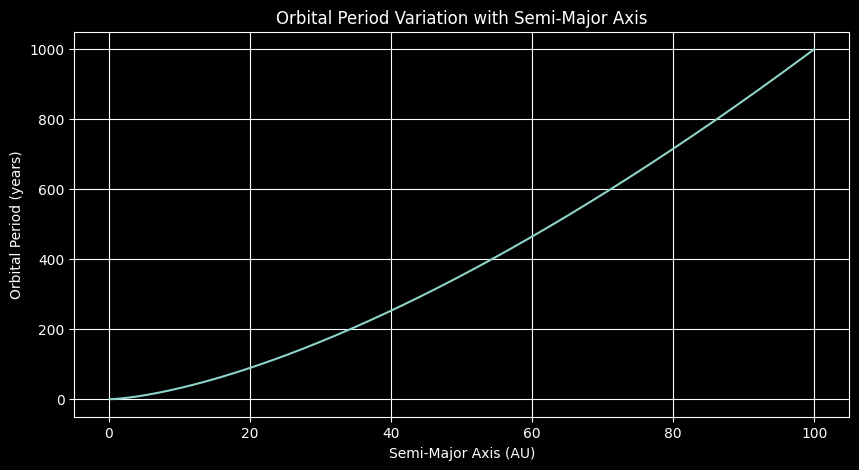

In [64]:
VariationPlot(semiMajorAxs=semiMajors,orbitalPeriods=periods)

## PDS70

In [65]:
gravitationalConstant = 39.47841760435743  # gravitational constant in AU^3 / solar mass / year^2
massPDS70 = 0.76 # Mass of PDS 70 in solar masses

In [66]:
def KeplerThirdLawPDS70(semiMajor:int or float,starMass:int or float)->int or float:
  """
    Apply Kepler's Third Law to calculate the orbital period for planets around PDS 70.

    Parameters:
    semiMajor (float): Semi-major axis of the planet's orbit (in AU).
    starMass (float): Mass of the star PDS 70 (in solar masses).

    Returns:
    float: Orbital period (in years).
  """
  return 2*np.pi*np.sqrt(semiMajor**3/(gravitationalConstant*starMass))

In [67]:
semiMajor70b = 20 # Semi-major axis of PDS 70 b in AU
semiMajor70c = 34.5 # Semi-major axis of PDS 70 c in AU

In [68]:
orbitalPeriod70b = KeplerThirdLawPDS70(semiMajor70b,massPDS70)
orbitalPeriod70c = KeplerThirdLawPDS70(semiMajor70c,massPDS70)

In [71]:
print(f"Orbital Period of PDS70-b: {orbitalPeriod70b} Earth years.")
print(f"Orbital Period of PDS70-c: {orbitalPeriod70c} Earth years.")

Orbital Period of PDS70-b: 102.5978352085154 Earth years.
Orbital Period of PDS70-c: 232.44587655261984 Earth years.
